In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [2]:
df = pd.read_pickle("Tank.pkl")
df.timestamp = pd.to_datetime(df.timestamp)
df_new = df.loc[df["CuStepNo ValueY"] != 2]
df_new["Next_Step"] = df_new["CuStepNo ValueY"].shift()
df_steps = df_new.loc[df_new["CuStepNo ValueY"] != df_new["Next_Step"]]

C:\Users\paulh\AppData\Local\Temp\ipykernel_27308\3322347456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Next_Step"] = df_new["CuStepNo ValueY"].shift()


In [3]:
#px.scatter(df,x="timestamp",y="FIC14002_PV_Out ValueY")


In [4]:
#px.scatter(df,x="timestamp",y="CuStepNo ValueY")

#durchschnittliche zeit

In [3]:
df_steps["time_since_start"] = 0
steps = df_steps.timestamp.unique()
for i in range(len(steps)-1):
    df_steps.loc[df_steps.timestamp == steps[i],"time_since_start"] = (df_new.loc[(df_new.timestamp >= steps[i])&(df_new.timestamp < steps[i+1])].timestamp -steps[i]).max()

C:\Users\paulh\AppData\Local\Temp\ipykernel_27308\1740335311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps["time_since_start"] = 0
C:\Users\paulh\AppData\Local\Temp\ipykernel_27308\1740335311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps.loc[df_steps.timestamp == steps[i],"time_since_start"] = (df_new.loc[(df_new.timestamp >= steps[i])&(df_new.timestamp < steps[i+1])].timestamp -steps[i]).max()


In [4]:
#replace all the 0s in time_since_start with the timedelta 0
df_steps.loc[df_steps.time_since_start == 0,"time_since_start"] = datetime.timedelta(0)

df_steps[:].groupby("Next_Step")["time_since_start"].mean()

Next_Step
1.0    0 days 00:01:10.103053435
3.0    0 days 00:04:14.329501915
7.0    0 days 00:08:53.312977099
8.0    0 days 00:03:16.417624521
Name: time_since_start, dtype: object

In [10]:
df_steps

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Time_next,Diff,time_since_start
0,2018-10-10 14:53:19,1,1,149.985779,100,0.070602,0.087963,100.000000,100.000000,0.000000,...,15,10.000000,0.127008,0.2,0,0.001710,NaN,NaT,NaT,0 days 00:04:07
248,2018-10-10 14:57:27,1,7,136.526093,100,0.063079,1.657986,62.768192,62.778381,1966.041138,...,15,28.206629,0.197753,0.2,0,0.001744,1.0,2018-10-10 14:53:19,0 days 00:04:08,0 days 00:01:12
321,2018-10-10 14:58:40,1,8,141.415466,100,0.059028,1.667824,61.538704,61.544369,1971.671631,...,15,28.761133,0.200745,0.2,0,0.001743,7.0,2018-10-10 14:57:27,0 days 00:01:13,0 days 00:08:52
854,2018-10-10 15:07:33,1,3,116.065994,100,0.058449,2.084491,66.077324,66.801804,1444.403442,...,15,22.631739,0.208638,0.2,0,0.001731,8.0,2018-10-10 14:58:40,0 days 00:08:53,0 days 00:03:17
1052,2018-10-11 10:21:45,4,1,152.251556,100,0.075810,0.089699,100.000000,100.000000,0.000000,...,15,10.000000,0.116767,0.2,0,0.001709,3.0,2018-10-10 15:07:33,0 days 19:14:12,0 days 00:04:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275911,2018-10-31 14:17:14,9,8,89.829849,100,0.055556,1.661458,62.184528,62.187527,1994.004883,...,15,28.974337,0.207777,0.2,0,0.001743,7.0,2018-10-31 14:16:03,0 days 00:01:11,0 days 00:08:56
276448,2018-10-31 14:26:11,9,3,65.929871,100,0.048032,1.863426,62.581421,62.581421,1947.954956,...,15,22.125351,0.193050,0.2,0,0.001734,8.0,2018-10-31 14:17:14,0 days 00:08:57,0 days 00:03:19
276648,2018-10-31 14:29:32,9,1,98.579819,100,0.063657,0.080440,100.000000,100.000000,0.000000,...,15,10.000000,0.111445,0.2,0,0.001679,3.0,2018-10-31 14:26:11,0 days 00:03:21,0 days 00:05:04
276953,2018-10-31 14:34:37,9,7,85.071869,100,0.050926,1.649884,61.568264,61.568264,1964.300537,...,15,26.333004,0.194102,0.2,0,0.001651,1.0,2018-10-31 14:29:32,0 days 00:05:05,0 days 00:01:12


In [5]:
times = df_steps[df_steps["CuStepNo ValueY"] == 1].timestamp.to_list()
df_test2 = pd.DataFrame(columns=df_new.columns)
df_test2.columns

Index(['timestamp', 'DeviationID ValueY', 'CuStepNo ValueY',
       'LevelMainTank ValueY', 'YC10001_MV ValueY', 'PI12002_PV_Out ValueY',
       'PI12003_PV_Out ValueY', 'YC14001_MV ValueY', 'FIC14002_MV ValueY',
       'FIC14002_PV_Out ValueY', 'FIC14002_SP ValueY', 'YC14006_MV ValueY',
       'PI14012_PV_Out ValueY', 'YC23001_MV ValueY', 'YC22001_MV ValueY',
       'YC21001_MV ValueY', 'FIC23002_PV_Out ValueY', 'FIC23002_MV ValueY',
       'FIC23002_SP ValueY', 'FIC22002_MV ValueY', 'FIC22002_PV_Out ValueY',
       'FIC22002_SP ValueY', 'FIC21002_MV ValueY', 'FIC21002_PV_Out ValueY',
       'FIC21002_SP ValueY', 'YS23004_Ctrl ValueY', 'YS22004_Ctrl ValueY',
       'YS21004_Ctrl ValueY', 'LIC23002_MV ValueY', 'LIC23002_PV_Out ValueY',
       'LIC23002_SP ValueY', 'LIC22002_MV ValueY', 'LIC22002_PV_Out ValueY',
       'LIC22002_SP ValueY', 'LIC21002_MV ValueY', 'LIC21002_PV_Out ValueY',
       'LIC21002_SP ValueY', 'PIC14007_MV ValueY', 'PIC14007_PV_Out ValueY',
       'PIC14007_SP Val

In [6]:
for i in range(times.__len__()-1):
    df_test1 = df_new.loc[(df_new.timestamp >=times[i])&(df_new.timestamp <times[i+1])].groupby("CuStepNo ValueY",as_index=False,sort=False).mean()
    df_test1["Batch"] = i
    df_test2 = pd.concat([df_test2,df_test1])

In [7]:
df_test2["time_since_start"] = df_steps[:-3].time_since_start.values

In [16]:
df_test1 = df_new.loc[(df_new.timestamp >=times[261])].groupby("CuStepNo ValueY",as_index=False,sort=False).mean()
df_test1

In [8]:
df_test2

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch,time_since_start
0,NaN,1.0,1,143.325596,100.0,0.064497,1.596452,74.971991,74.960272,1928.678075,...,7.860605,15.0,26.784184,0.203986,0.2,0.0,0.001735,1.0,0.0,0 days 00:04:07
1,NaN,1.0,7,138.264533,100.0,0.063412,1.638033,61.844759,61.839022,2003.630127,...,7.327218,15.0,28.956889,0.200543,0.2,0.0,0.001753,6.917808,0.0,0 days 00:01:12
2,NaN,1.0,8,125.811046,100.0,0.058851,1.633885,61.447127,61.446802,1999.041225,...,10.140591,15.0,22.19023,0.198639,0.2,0.0,0.001731,7.998124,0.0,0 days 00:08:52
3,NaN,1.0,3,137.822261,100.0,0.067457,0.177095,99.186257,99.20213,59.363122,...,5.513165,15.0,11.107584,0.113143,0.2,0.0,0.001797,3.025253,0.0,0 days 00:03:17
0,NaN,4.0,1,143.723035,100.0,0.07254,2.75502,35.386997,35.359601,1982.813227,...,7.962883,15.0,26.632608,0.20318,0.2,0.0,0.0017,1.008032,1.0,0 days 00:04:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NaN,9.0,3,87.939399,100.0,0.061588,0.151185,99.425066,99.438855,46.422369,...,5.363418,15.0,10.952062,0.116409,0.2,0.0,0.001762,3.025253,259.0,0 days 00:03:17
0,NaN,9.0,1,92.642519,100.0,0.056382,1.609598,71.657941,71.645104,1944.71444,...,7.392297,15.0,25.904307,0.202166,0.2,0.0,0.001716,1.006579,260.0,0 days 00:05:03
1,NaN,9.0,7,86.714657,100.0,0.054431,1.646828,63.207341,63.211702,1998.336496,...,7.392508,15.0,28.740085,0.202634,0.2,0.0,0.001745,6.915493,260.0,0 days 00:01:10
2,NaN,9.0,8,74.960493,100.0,0.048674,1.642012,60.54188,60.541048,1999.833614,...,10.141812,15.0,22.154647,0.198711,0.2,0.0,0.001717,7.998138,260.0,0 days 00:08:56


In [8]:
df_steps_new = df_steps[:-3]
df_steps_new["Batch"] = df_test2.Batch.values

C:\Users\paulh\AppData\Local\Temp\ipykernel_27308\993715933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps_new["Batch"] = df_test2.Batch.values


In [44]:
df_steps_new

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,time_since_start,Batch
0,2018-10-10 14:53:19,1,1,149.985779,100,0.070602,0.087963,100.000000,100.000000,0.000000,...,1.979745,15,10.000000,0.127008,0.2,0,0.001710,NaN,0 days 00:04:07,0.0
248,2018-10-10 14:57:27,1,7,136.526093,100,0.063079,1.657986,62.768192,62.778381,1966.041138,...,13.993489,15,28.206629,0.197753,0.2,0,0.001744,1.0,0 days 00:01:12,0.0
321,2018-10-10 14:58:40,1,8,141.415466,100,0.059028,1.667824,61.538704,61.544369,1971.671631,...,3.960286,15,28.761133,0.200745,0.2,0,0.001743,7.0,0 days 00:08:52,0.0
854,2018-10-10 15:07:33,1,3,116.065994,100,0.058449,2.084491,66.077324,66.801804,1444.403442,...,13.996673,15,22.631739,0.208638,0.2,0,0.001731,8.0,0 days 00:03:17,0.0
1052,2018-10-11 10:21:45,4,1,152.251556,100,0.075810,0.089699,100.000000,100.000000,0.000000,...,1.978950,15,10.000000,0.116767,0.2,0,0.001709,3.0,0 days 00:04:08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275338,2018-10-31 14:07:40,9,3,65.749191,100,0.052662,1.929977,69.768890,69.986938,1383.175293,...,13.945746,15,21.875132,0.195403,0.2,0,0.001765,8.0,0 days 00:03:17,259.0
275536,2018-10-31 14:10:59,9,1,99.116302,100,0.065972,0.076389,100.000000,100.000000,0.000000,...,1.986111,15,10.000000,0.112330,0.2,0,0.001769,3.0,0 days 00:05:03,260.0
275840,2018-10-31 14:16:03,9,7,86.316208,100,0.055556,1.764468,62.380203,62.709000,1888.127563,...,14.010200,15,27.097742,0.203593,0.2,0,0.001762,1.0,0 days 00:01:10,260.0
275911,2018-10-31 14:17:14,9,8,89.829849,100,0.055556,1.661458,62.184528,62.187527,1994.004883,...,3.999277,15,28.974337,0.207777,0.2,0,0.001743,7.0,0 days 00:08:56,260.0


In [92]:
times_new = df_steps_new[df_steps_new["Batch"] == 1].timestamp.to_list()

In [91]:
df_steps_new[df_steps_new["Batch"] == 1].timestamp.to_list()

[Timestamp('2018-10-11 10:21:45'),
 Timestamp('2018-10-11 10:25:54'),
 Timestamp('2018-10-11 10:27:05'),
 Timestamp('2018-10-11 10:35:57')]

In [98]:
for i in range (df_steps_new.Batch.unique().__len__()):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


In [99]:
df_steps_new.Batch.unique().__len__()

261

In [105]:
df_new["Batch"] = 0
for i in range (df_steps_new.Batch.unique().__len__()-1):
    times_new = df_steps_new[df_steps_new["Batch"] == i].timestamp.to_list()
    times_new1 = df_steps_new[df_steps_new["Batch"] == i+1].timestamp.to_list()
    df_new.loc[(df_new.timestamp >=times_new[0])&(df_new.timestamp <=times_new1[0]),"Batch"] = i
df_new.loc[(df_new.timestamp >=times_new1[0]),"Batch"] = i+1

C:\Users\paulh\AppData\Local\Temp\ipykernel_27308\3487400102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Batch"] = 0


In [106]:
df_new[(df_new.Batch == 0)&(df_new["CuStepNo ValueY"] == 3)]

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch
854,2018-10-10 15:07:33,1,3,116.065994,100,0.058449,2.084491,66.077324,66.801804,1444.403442,...,553.655457,13.996673,15,22.631739,0.208638,0.2,0,0.001731,8.0,0
855,2018-10-10 15:07:34,1,3,116.051575,100,0.057870,1.973958,70.598381,70.873932,1311.118652,...,498.842590,13.991898,15,22.638519,0.208508,0.2,0,0.001730,3.0,0
856,2018-10-10 15:07:35,1,3,116.054092,100,0.057870,1.744792,73.138176,73.291603,1424.559448,...,413.339111,13.905165,15,22.989956,0.210575,0.2,0,0.001773,3.0,0
857,2018-10-10 15:07:36,1,3,116.104355,100,0.053819,1.581018,76.193642,76.435226,1396.036133,...,331.814240,13.780237,15,23.548422,0.217275,0.2,0,0.001804,3.0,0
858,2018-10-10 15:07:37,1,3,116.275604,100,0.059606,1.436921,79.421844,79.613586,1360.845581,...,273.582184,13.589265,15,24.380598,0.227786,0.2,0,0.001844,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,2018-10-10 15:10:46,1,3,149.072296,100,0.074074,0.087963,100.000000,100.000000,0.000000,...,0.000000,2.026693,15,10.000000,0.110373,0.2,0,0.001766,3.0,0
1048,2018-10-10 15:10:47,1,3,149.119293,100,0.073495,0.083912,100.000000,100.000000,0.000000,...,0.000000,2.024306,15,10.000000,0.110383,0.2,0,0.001742,3.0,0
1049,2018-10-10 15:10:48,1,3,149.119293,100,0.072917,0.085648,100.000000,100.000000,0.000000,...,0.000000,2.004413,15,10.000000,0.110431,0.2,0,0.001726,3.0,0
1050,2018-10-10 15:10:49,1,3,149.200409,100,0.070602,0.089699,100.000000,100.000000,0.000000,...,0.000000,2.004413,15,10.000000,0.110489,0.2,0,0.001714,3.0,0


In [20]:
df_test2["DeviationID ValueY"].unique()

array([1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 2.0, 3.0, 10.0,
       9.916666666666666], dtype=object)

In [22]:
df_test2[df_test2["DeviationID ValueY"] == 9.916666666666666]

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch,time_since_start
3,NaN,9.916667,3,93.313731,100.0,0.052623,0.073167,100.0,100.0,0.0,...,3.760323,15.0,10.452435,0.119192,0.2,0.0,0.001774,3.041667,238.0,0 days 00:01:59


In [25]:
df_new.loc[(df_new.timestamp >=times[238])&(df_new.timestamp <times[239])&(df_new["CuStepNo ValueY"] == 3)]["DeviationID ValueY"].value_counts()

10    119
0       1
Name: DeviationID ValueY, dtype: int64

In [26]:
df_test2.columns

Index(['timestamp', 'DeviationID ValueY', 'CuStepNo ValueY',
       'LevelMainTank ValueY', 'YC10001_MV ValueY', 'PI12002_PV_Out ValueY',
       'PI12003_PV_Out ValueY', 'YC14001_MV ValueY', 'FIC14002_MV ValueY',
       'FIC14002_PV_Out ValueY', 'FIC14002_SP ValueY', 'YC14006_MV ValueY',
       'PI14012_PV_Out ValueY', 'YC23001_MV ValueY', 'YC22001_MV ValueY',
       'YC21001_MV ValueY', 'FIC23002_PV_Out ValueY', 'FIC23002_MV ValueY',
       'FIC23002_SP ValueY', 'FIC22002_MV ValueY', 'FIC22002_PV_Out ValueY',
       'FIC22002_SP ValueY', 'FIC21002_MV ValueY', 'FIC21002_PV_Out ValueY',
       'FIC21002_SP ValueY', 'YS23004_Ctrl ValueY', 'YS22004_Ctrl ValueY',
       'YS21004_Ctrl ValueY', 'LIC23002_MV ValueY', 'LIC23002_PV_Out ValueY',
       'LIC23002_SP ValueY', 'LIC22002_MV ValueY', 'LIC22002_PV_Out ValueY',
       'LIC22002_SP ValueY', 'LIC21002_MV ValueY', 'LIC21002_PV_Out ValueY',
       'LIC21002_SP ValueY', 'PIC14007_MV ValueY', 'PIC14007_PV_Out ValueY',
       'PIC14007_SP Val

Fehler gefunden

Ihn fragen ob wir des umändern sollen

In [42]:
df_new[(df_new["Batch"] == 0)&(df_new["DeviationID ValueY"] != 1)]

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch
1904,2018-10-11 10:35:57,4,3,117.315811,100,0.063079,2.819444,31.591270,31.575809,2038.650513,...,567.997681,14.010995,15,21.732809,0.196952,0.2,0,0.001749,8.0,0
1905,2018-10-11 10:35:58,4,3,117.423950,100,0.067130,2.771412,34.102444,34.245762,1641.707642,...,502.748840,14.016565,15,21.832338,0.196856,0.2,0,0.001725,3.0,0
1906,2018-10-11 10:35:59,4,3,117.423950,100,0.065972,2.523727,38.134075,38.207790,1455.255859,...,414.279510,13.944155,15,22.602621,0.203306,0.2,0,0.001736,3.0,0
1907,2018-10-11 10:36:00,4,3,117.462204,100,0.064236,1.987847,40.572487,40.787563,1462.304321,...,333.550354,13.761935,15,23.253971,0.215693,0.2,0,0.001745,3.0,0
1908,2018-10-11 10:36:01,4,3,117.488983,100,0.059606,1.716435,43.503304,43.730358,1432.369995,...,275.824646,13.576533,15,24.073914,0.230904,0.2,0,0.001767,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278487,2018-10-31 15:00:11,9,8,112.293930,100,-0.899306,-0.582176,100.000000,100.000000,0.000000,...,800.000000,7.470197,15,10.000000,-0.009348,0.2,0,-0.009062,8.0,0
278488,2018-10-31 15:00:12,9,8,112.352432,100,-0.902199,-0.586227,100.000000,100.000000,0.000000,...,800.000000,7.478154,15,10.000000,-0.009345,0.2,0,-0.009085,8.0,0
278489,2018-10-31 15:00:13,9,8,112.400436,100,-0.901042,-0.565394,100.000000,100.000000,0.000000,...,800.000000,7.471788,15,10.000000,-0.009364,0.2,0,-0.009090,8.0,0
278490,2018-10-31 15:00:14,9,8,112.441315,100,-0.902778,-0.578704,100.000000,100.000000,0.000000,...,800.000000,7.475767,15,10.000000,-0.009384,0.2,0,-0.009099,8.0,0


In [43]:
df_new

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch
0,2018-10-10 14:53:19,1,1,149.985779,100,0.070602,0.087963,100.0,100.0,0.0,...,0.611938,1.979745,15,10.0,0.127008,0.2,0,0.001710,NaN,0
1,2018-10-10 14:53:20,1,1,149.985779,100,0.070602,0.086806,100.0,100.0,0.0,...,1.151489,1.979745,15,10.0,0.127021,0.2,0,0.001715,1.0,0
2,2018-10-10 14:53:21,1,1,150.027740,100,0.071759,0.103588,100.0,100.0,0.0,...,11.073669,1.986111,15,10.0,0.127021,0.2,0,0.001712,1.0,0
3,2018-10-10 14:53:22,1,1,150.043427,100,0.072338,0.173611,100.0,100.0,0.0,...,11.819598,1.982133,15,10.0,0.126945,0.2,0,0.001698,1.0,0
4,2018-10-10 14:53:23,1,1,150.015564,100,0.065972,0.326968,100.0,100.0,0.0,...,22.069590,1.982133,15,10.0,0.126945,0.2,0,0.001700,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278487,2018-10-31 15:00:11,9,8,112.293930,100,-0.899306,-0.582176,100.0,100.0,0.0,...,800.000000,7.470197,15,10.0,-0.009348,0.2,0,-0.009062,8.0,0
278488,2018-10-31 15:00:12,9,8,112.352432,100,-0.902199,-0.586227,100.0,100.0,0.0,...,800.000000,7.478154,15,10.0,-0.009345,0.2,0,-0.009085,8.0,0
278489,2018-10-31 15:00:13,9,8,112.400436,100,-0.901042,-0.565394,100.0,100.0,0.0,...,800.000000,7.471788,15,10.0,-0.009364,0.2,0,-0.009090,8.0,0
278490,2018-10-31 15:00:14,9,8,112.441315,100,-0.902778,-0.578704,100.0,100.0,0.0,...,800.000000,7.475767,15,10.0,-0.009384,0.2,0,-0.009099,8.0,0


In [11]:
#Testset und Featureengineering

#78 random numbers between 0 and 260
randomlist1 = random.sample(range(0, 260), 78)

df_test1 = df_new.loc[df_new["Batch"].isin(randomlist1)]
df_train1 = df_new.loc[~df_new["Batch"].isin(randomlist1)]

y_train1 = df_train1["DeviationID ValueY"].astype(int)
y_test1 = df_test1["DeviationID ValueY"].astype(int)
X_train1 = df_train1.drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)
X_test1 = df_test1.drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)

,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch
2103,2018-10-11 10:43:04,5,1,150.834198,100,0.076968,0.092014,100.000000,100.000000,0.000000,...,2.695843,1.990090,15,10.000000,0.117480,0.2,0,0.001706,3.0,2
2104,2018-10-11 10:43:05,5,1,150.829834,100,0.075231,0.090856,100.000000,100.000000,0.000000,...,8.377276,1.984520,15,10.000000,0.117495,0.2,0,0.001683,1.0,2
2105,2018-10-11 10:43:06,5,1,150.821411,100,0.075810,0.132523,100.000000,100.000000,0.000000,...,13.978702,1.980541,15,10.000000,0.117520,0.2,0,0.001683,1.0,2
2106,2018-10-11 10:43:07,5,1,150.721680,100,0.076389,0.241319,100.000000,100.000000,0.000000,...,19.084961,1.986111,15,10.000000,0.117510,0.2,0,0.001702,1.0,2
2107,2018-10-11 10:43:08,5,1,150.600708,100,0.075231,0.401042,100.000000,100.000000,0.000000,...,24.354757,1.988498,15,10.000000,0.117516,0.2,0,0.001712,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274219,2018-10-31 13:49:01,9,8,66.355194,100,0.042824,1.663194,62.429520,62.456963,1980.282227,...,559.777222,13.980758,15,22.205601,0.194110,0.2,0,0.001664,8.0,258
274220,2018-10-31 13:49:02,9,8,66.333313,100,0.046296,1.660301,62.654938,62.651356,1969.295898,...,559.993530,13.987920,15,22.146711,0.193729,0.2,0,0.001679,8.0,258
274221,2018-10-31 13:49:03,9,8,66.315811,100,0.043981,1.629051,62.431763,62.419979,2023.571777,...,560.244629,13.987920,15,22.100382,0.193565,0.2,0,0.001683,8.0,258
274222,2018-10-31 13:49:04,9,8,66.301193,100,0.048032,1.607639,62.304813,62.293076,2023.475586,...,560.289978,13.998263,15,22.160700,0.194567,0.2,0,0.001691,8.0,258


In [14]:
#knn mit dynamic time warping
from sklearn.neighbors import KNeighborsClassifier
from tslearn.metrics import dtw
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric=dtw)
knn.fit(X_train1,y_train1)
y_pred1 = knn.predict(X_test1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)


KeyboardInterrupt: 

In [27]:
#Dynamic Time Warping on df_test1 on DeviationID ValueY
from tslearn.metrics import dtw
from tslearn.metrics import dtw_path
from tslearn.metrics import dtw_subsequence_path
from tslearn.metrics import dtw_path_from_metric

df_test1["DeviationID ValueY"].unique()


array([ 5,  1,  9,  2,  7, 10,  4,  3,  6,  8], dtype=int64)

In [62]:
#best parameters
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=1000,decision_function_shape="ovr",cache_size=400)
svc.fit(X_train1, y_train1)
y_pred = svc.predict(X_test1)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(X_test1, y_test1)))

In [27]:
df_test2["time_since_start"] = df_test2["time_since_start"].dt.total_seconds()

In [28]:
#Testset und Featureengineering

#78 random numbers between 0 and 260
randomlist = random.sample(range(0, 260), 78)

df_test = df_test2.loc[df_test2["Batch"].isin(randomlist)]
df_train = df_test2.loc[~df_test2["Batch"].isin(randomlist)]

y_train = df_train["DeviationID ValueY"].astype(int)
y_test = df_test["DeviationID ValueY"].astype(int)
X_train = df_train.drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)
X_test = df_test.drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)

In [29]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'multi_class': ['ovr']}
grid = GridSearchCV(LogisticRegression(solver='saga',max_iter=5000), param_grid, refit = True, verbose = 3,n_jobs=4)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.score(X_test, y_test))



Fitting 5 folds for each of 14 candidates, totalling 70 fits


KeyboardInterrupt: 

In [30]:
df_test1[(df_test1["DeviationID ValueY"]==5)&(df_test1["CuStepNo ValueY"]==1)&(df_test1["Batch"]==2)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)

CuStepNo ValueY           0
LevelMainTank ValueY      0
YC10001_MV ValueY         0
PI12002_PV_Out ValueY     0
PI12003_PV_Out ValueY     0
YC14001_MV ValueY         0
FIC14002_MV ValueY        0
FIC14002_PV_Out ValueY    0
FIC14002_SP ValueY        0
YC14006_MV ValueY         0
PI14012_PV_Out ValueY     0
YC23001_MV ValueY         0
YC22001_MV ValueY         0
YC21001_MV ValueY         0
FIC23002_PV_Out ValueY    0
FIC23002_MV ValueY        0
FIC23002_SP ValueY        0
FIC22002_MV ValueY        0
FIC22002_PV_Out ValueY    0
FIC22002_SP ValueY        0
FIC21002_MV ValueY        0
FIC21002_PV_Out ValueY    0
FIC21002_SP ValueY        0
YS23004_Ctrl ValueY       0
YS22004_Ctrl ValueY       0
YS21004_Ctrl ValueY       0
LIC23002_MV ValueY        0
LIC23002_PV_Out ValueY    0
LIC23002_SP ValueY        0
LIC22002_MV ValueY        0
LIC22002_PV_Out ValueY    0
LIC22002_SP ValueY        0
LIC21002_MV ValueY        0
LIC21002_PV_Out ValueY    0
LIC21002_SP ValueY        0
PIC14007_MV ValueY  

In [29]:
df_train1[(df_train1["DeviationID ValueY"]==5)&(df_train1["CuStepNo ValueY"]==1)&(df_train1["Batch"]==13)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)

CuStepNo ValueY           0
LevelMainTank ValueY      0
YC10001_MV ValueY         0
PI12002_PV_Out ValueY     0
PI12003_PV_Out ValueY     0
YC14001_MV ValueY         0
FIC14002_MV ValueY        0
FIC14002_PV_Out ValueY    0
FIC14002_SP ValueY        0
YC14006_MV ValueY         0
PI14012_PV_Out ValueY     0
YC23001_MV ValueY         0
YC22001_MV ValueY         0
YC21001_MV ValueY         0
FIC23002_PV_Out ValueY    0
FIC23002_MV ValueY        0
FIC23002_SP ValueY        0
FIC22002_MV ValueY        0
FIC22002_PV_Out ValueY    0
FIC22002_SP ValueY        0
FIC21002_MV ValueY        0
FIC21002_PV_Out ValueY    0
FIC21002_SP ValueY        0
YS23004_Ctrl ValueY       0
YS22004_Ctrl ValueY       0
YS21004_Ctrl ValueY       0
LIC23002_MV ValueY        0
LIC23002_PV_Out ValueY    0
LIC23002_SP ValueY        0
LIC22002_MV ValueY        0
LIC22002_PV_Out ValueY    0
LIC22002_SP ValueY        0
LIC21002_MV ValueY        0
LIC21002_PV_Out ValueY    0
LIC21002_SP ValueY        0
PIC14007_MV ValueY  

In [34]:
df_train1[(df_train1["DeviationID ValueY"]==7)&(df_train1["CuStepNo ValueY"]==1)&(df_train1["Batch"]==5)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)

,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,FIC14002_SP ValueY,YC14006_MV ValueY,...,LIC22002_PV_Out ValueY,LIC22002_SP ValueY,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY
5299,1,148.893036,100,0.075231,0.090278,100.000000,100.000000,0.000000,2000.0,12.500000,...,1.960648,2,0.000000,1.974971,15,10.000000,0.100465,0.2,0,0.001721
5300,1,148.868256,100,0.075231,0.093171,100.000000,100.000000,0.000000,2000.0,12.500000,...,1.967810,2,3.612683,1.979745,15,10.000000,0.100510,0.2,0,0.001748
5301,1,148.868256,100,0.075810,0.145255,100.000000,100.000000,0.000000,2000.0,12.500000,...,1.970197,2,8.967529,1.980541,15,10.000000,0.100530,0.2,0,0.001749
5302,1,148.848694,100,0.074653,0.145255,100.000000,100.000000,0.000000,2000.0,12.500000,...,1.971788,2,14.570496,1.976562,15,10.000000,0.100562,0.2,0,0.001737
5303,1,148.847015,100,0.074653,0.424769,100.000000,100.000000,0.000000,2000.0,12.500000,...,1.967810,2,20.050339,1.974971,15,10.000000,0.100588,0.2,0,0.001737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,1,136.690704,100,0.064236,1.687500,59.466866,59.502449,1965.691040,2000.0,34.278091,...,1.972584,2,107.764931,13.860604,15,27.791792,0.201977,0.2,0,0.001694
5542,1,136.689850,100,0.071759,1.687500,59.619949,59.654671,1965.148560,2000.0,34.442451,...,1.969401,2,105.750839,13.908348,15,27.793737,0.201006,0.2,0,0.001692
5543,1,136.689941,100,0.065972,1.684607,59.740265,59.788239,1966.346680,2000.0,34.593536,...,1.964627,2,104.875748,13.933810,15,27.730692,0.199976,0.2,0,0.001707
5544,1,136.676788,100,0.068287,1.621528,59.553665,59.542236,2022.857666,2000.0,34.590744,...,1.966218,2,103.698792,13.964844,15,27.742775,0.199415,0.2,0,0.001687


In [38]:
#dtw between the tow prior notebooks cells  
from tslearn.metrics import dtw
from tslearn.metrics import dtw_path
from tslearn.metrics import dtw_subsequence_path
from tslearn.metrics import dtw_path_from_metric

df_train1[df_train1["CuStepNo ValueY"] == 3]
#dtw(df_test1[(df_test1["DeviationID ValueY"]==5)&(df_test1["CuStepNo ValueY"]==1)&(df_test1["Batch"]==2)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1),df_train1[(df_train1["DeviationID ValueY"]==7)&(df_train1["CuStepNo ValueY"]==1)&(df_train1["Batch"]==5)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1))


,timestamp,DeviationID ValueY,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,Batch
854,2018-10-10 15:07:33,1,3,116.065994,100,0.058449,2.084491,66.077324,66.801804,1444.403442,...,553.655457,13.996673,15,22.631739,0.208638,0.2,0,0.001731,8.0,0
855,2018-10-10 15:07:34,1,3,116.051575,100,0.057870,1.973958,70.598381,70.873932,1311.118652,...,498.842590,13.991898,15,22.638519,0.208508,0.2,0,0.001730,3.0,0
856,2018-10-10 15:07:35,1,3,116.054092,100,0.057870,1.744792,73.138176,73.291603,1424.559448,...,413.339111,13.905165,15,22.989956,0.210575,0.2,0,0.001773,3.0,0
857,2018-10-10 15:07:36,1,3,116.104355,100,0.053819,1.581018,76.193642,76.435226,1396.036133,...,331.814240,13.780237,15,23.548422,0.217275,0.2,0,0.001804,3.0,0
858,2018-10-10 15:07:37,1,3,116.275604,100,0.059606,1.436921,79.421844,79.613586,1360.845581,...,273.582184,13.589265,15,24.380598,0.227786,0.2,0,0.001844,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276643,2018-10-31 14:29:26,9,3,98.288361,100,0.060185,0.078704,100.000000,100.000000,0.000000,...,0.000000,2.016348,15,10.000000,0.111238,0.2,0,0.001690,3.0,0
276644,2018-10-31 14:29:27,9,3,98.364868,100,0.063657,0.078125,100.000000,100.000000,0.000000,...,0.000000,2.011574,15,10.000000,0.111272,0.2,0,0.001706,3.0,0
276645,2018-10-31 14:29:28,9,3,98.364868,100,0.064236,0.080440,100.000000,100.000000,0.000000,...,0.000000,2.012370,15,10.000000,0.111278,0.2,0,0.001706,3.0,0
276646,2018-10-31 14:29:29,9,3,98.434006,100,0.065394,0.079282,100.000000,100.000000,0.000000,...,0.000000,2.001230,15,10.000000,0.111320,0.2,0,0.001682,3.0,0


In [ ]:
#best parameters
logreg = LogisticRegression(penalty="l1",solver='saga',max_iter=5000,multi_class="multinomial",C=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.80


C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#mit ovr

logreg = LogisticRegression(penalty="l1",solver='saga',max_iter=10000,multi_class="ovr",C=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


Feature: 0, Score: -0.80656
Feature: 1, Score: 1.90969
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.98375
Feature: 4, Score: -9.40366
Feature: 5, Score: -0.89580
Feature: 6, Score: -1.01452
Feature: 7, Score: 3.41125
Feature: 8, Score: 0.62691
Feature: 9, Score: -1.42113
Feature: 10, Score: -0.74380
Feature: 11, Score: 1.22542
Feature: 12, Score: 0.00000
Feature: 13, Score: -2.15887
Feature: 14, Score: 3.72542
Feature: 15, Score: 1.13421
Feature: 16, Score: -0.49255
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.09605
Feature: 19, Score: -1.21175
Feature: 20, Score: -1.87805
Feature: 21, Score: 0.66907
Feature: 22, Score: -0.45707
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: -0.51832
Feature: 27, Score: 6.32948
Feature: 28, Score: -1.17210
Feature: 29, Score: 1.35882
Feature: 30, Score: -7.51036
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.45652
Feature: 33, Score: 1.50098
Feature: 34, Score: 0.00000
Feature: 35, Sc

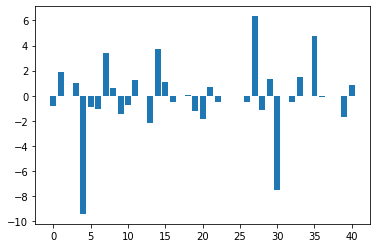

In [ ]:
#feature importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [ ]:
#accuracy for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        24
           2       0.94      1.00      0.97        32
           3       0.93      0.97      0.95        40
           4       0.96      0.92      0.94        24
           5       0.95      0.80      0.86        44
           6       0.52      0.55      0.54        20
           7       0.91      0.75      0.82        28
           8       1.00      1.00      1.00        36
           9       0.71      0.50      0.59        44
          10       0.38      0.60      0.46        20

    accuracy                           0.80       312
   macro avg       0.79      0.79      0.78       312
weighted avg       0.82      0.80      0.80       312



In [ ]:
#SVC
from sklearn.svm import SVC


#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, "scale","auto"],'decision_function_shape':["ovo","ovr"],'kernel':["poly","rbf","sigmoid"]}
grid = GridSearchCV(SVC(cache_size=400), param_grid, refit = True, verbose = 3,n_jobs=4)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.score(X_test, y_test))


Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=1000, cache_size=400, decision_function_shape='ovo')
0.7707948932997857
0.842948717948718


In [ ]:
#best parameters
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=1000,decision_function_shape="ovr",cache_size=400)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of SVC classifier on test set: 0.88


In [ ]:

#accuracy for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        28
           2       0.94      0.94      0.94        36
           3       1.00      0.96      0.98        24
           4       0.97      0.97      0.97        32
           5       0.89      0.86      0.87        28
           6       0.96      0.72      0.83        36
           7       0.82      0.89      0.85        36
           8       1.00      1.00      1.00        32
           9       0.68      0.90      0.78        29
          10       0.83      0.65      0.73        31

    accuracy                           0.88       312
   macro avg       0.89      0.88      0.88       312
weighted avg       0.89      0.88      0.88       312



In [ ]:

# import datetime
# import matplotlib.pyplot as plt

# # import data to data frame
# n=datetime.datetime.now()
# df=pd.read_csv('SmA-Four-Tank-Batch-Process_V2.csv',delimiter=';')
# n2=datetime.datetime.now()

# # print first lines of data frame
# print(df.head())
# # print data types
# print(df.dtypes)
# # timestamp is an object, not a timestamp
# df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%dT%H:%M:%S.%f')

# print('Nach Umwandlung in ein Datumsformat:')
# print('Erster Zeitstempel: {}'.format(df.at[1,'timestamp']))
# print('Differenz der Zeitstempel: {}'.format(df['timestamp'].diff()))
# print('Format des Zeitstempels: {}'.format(df['timestamp'].dtype))
# # save data frame as pickle - more efficient
# df.to_pickle('SmA-Four-Tank-Batch-Process_V2.pkl')
# # read data frame from pickle
# n3=datetime.datetime.now()
# df=pd.read_pickle('SmA-Four-Tank-Batch-Process_V2.pkl')
# n4=datetime.datetime.now()

# print('Time to read data into data frame from csv: {}'.format(n2-n))
# print('Time to read data into data frame from pickle: {}'.format(n4-n3))
# # print columns of data frame
# print(df.columns)
# # plot column FIC14002_PV_Out ValueY (flow rate)
# plt.subplot(121)
# plt.plot(df['timestamp'],df['FIC14002_PV_Out ValueY'])
# plt.ylabel('mass flow of F14002 / (kg/h)')
# plt.xlabel('date')
# # plot step number
# plt.subplot(122)
# plt.plot(df['timestamp'],df['CuStepNo ValueY'])
# plt.ylabel('step number')
# plt.xlabel('date')
# plt.show()
# # filter dataframe by step 1
# df1=df[df['CuStepNo ValueY']==1]
# print(df.describe())
# print(df1.describe())
# print('Shape of df (all steps): {}'.format(df.shape))
# print('Shape of df1 (step 1): {}'.format(df1.shape))

In [ ]:
# import pandas as pd
# # read data frame from pickle
# df=pd.read_pickle('SmA-Four-Tank-Batch-Process_V2.pkl')
# # remove steps data are not mentioned in the documentation
# vsteps=[1,7,8,3]
# df=df[df['CuStepNo ValueY'].isin(vsteps)]
# # determine start and end of steps
# df['dstep_p']=df['CuStepNo ValueY'].diff()
# df['dstep_n']=df['CuStepNo ValueY'].diff(-1)
# # select rows with a step change
# dfsen=df[(df['dstep_n']!=0)]
# dfsep=df[(df['dstep_p']!=0)]
# dfse=pd.concat([dfsen,dfsep])
# dfse=dfse.sort_values(by=['timestamp'])
# # create new dataframe where we store extracted information
# dfinfo_steps=pd.DataFrame(columns=['step_length','start','end','stepn'])
# # iterative approach
# pstep=-1
# c=0
# for n in range(dfse.shape[0]):
#     # get row
#     r=dfse.iloc[n]
#     if pstep==r['CuStepNo ValueY']:
#         # determine step length
#         stepl=r['timestamp']-dfse.iloc[n-1]['timestamp']
#         # update dataframe
#         dfinfo_steps.loc[c]=(stepl,dfse.iloc[n-1]['timestamp'],r['timestamp'],r['CuStepNo ValueY'])
#         c=c+1
#     else:
#         pstep=r['CuStepNo ValueY']
# print(dfinfo_steps.head())
# print('Max step_length: {}'.format(dfinfo_steps['step_length'].max()))
# print('Min step_length: {}'.format(dfinfo_steps['step_length'].min()))
# print('#steps: {}'.format(dfinfo_steps.shape[0]))
# # now determine whether the batch is complete
# batchn=1
# batchi=-1
# dfinfo_steps["batchn"]=0
# dfinfo_steps["is_complete"]=False
# dfinfo_batches=pd.DataFrame(columns=['batch_length','start','end','steps','batchn','is_complete'])
# n=0
# b=0
# while True:
#     if n+len(vsteps)>dfinfo_steps.shape[0]:
#         # complete info at incomplete, last batch
#         steps=[]
#         for v in range(dfinfo_steps.shape[0]-n):
#             dfinfo_steps.at[n+v,'batchn']=batchi
#             dfinfo_steps.at[n+v,'is_complete']=False
#             steps.append(dfinfo_steps.at[n+v,'stepn'])
#         dfinfo_batches.loc[b]=[dfinfo_steps.at[n+v,'end']-dfinfo_steps.at[n,'start'],dfinfo_steps.at[n,'start'], \
#                                dfinfo_steps.at[n+v,'end'],steps,batchi,False]
#         b=b+1
#         break
#     # check if all steps of a batch are present and in correct order
#     isCorrect=True
#     for v in range(len(vsteps)):
#         isCorrect=dfinfo_steps.loc[n+v,'stepn']==vsteps[v]
#         if not isCorrect:
#             break
#     if isCorrect:
#         steps=[]
#         for v in range(len(vsteps)):
#             dfinfo_steps.at[n+v,'batchn']=batchn
#             dfinfo_steps.at[n+v,'is_complete']=True
#             steps.append(dfinfo_steps.at[n+v,'stepn'])
#         dfinfo_batches.loc[b]=[dfinfo_steps.at[n+v,'end']-dfinfo_steps.at[n,'start'],dfinfo_steps.at[n,'start'], \
#                                dfinfo_steps.at[n+v,'end'],steps,batchn,True]
#         n=n+len(vsteps)
#         batchn=batchn+1
#         b=b+1
#     else:
#         steps=[]
#         for vc in range(v):
#             dfinfo_steps.at[n+vc,'batchn']=batchi
#             dfinfo_steps.at[n+vc,'is_complete']=False
#             steps.append(dfinfo_steps.at[n+v,'stepn'])
#         dfinfo_batches.loc[b]=[dfinfo_steps.at[n+vc,'end']-dfinfo_steps.at[n,'start'],dfinfo_steps.at[n,'start'], \
#                                dfinfo_steps.at[n+vc,'end'],steps,batchi,False]
#         batchi=batchi-1
#         n=n+vc
#         b=b+1
# # save dfinfo_steps to file
# dfinfo_steps.to_pickle('SmA-Four-Tank-Info-Steps.pkl')
# dfinfo_batches.to_pickle('SmA-Four-Tank-Info-Batches.pkl')

In [ ]:
# import pandas as pd
# dfinfo_steps=pd.read_pickle('SmA-Four-Tank-Info-Steps.pkl')
# dfinfo_batches=pd.read_pickle('SmA-Four-Tank-Info-Batches.pkl')
# print('#complete batches: {}'.format(dfinfo_steps['batchn'].max()))
# print('#incomplete batches: {}'.format(abs(dfinfo_steps['batchn'].min())))
# print('step#\tshortest\tlongest')
# for v in set(dfinfo_steps['stepn']):
#     tmp=dfinfo_steps[dfinfo_steps['stepn']==v]
#     print('{}\t{}\t\t{}'.format(v,tmp['step_length'].min().total_seconds(),tmp['step_length'].max().total_seconds()))
# print('Longest batch: {}'.format(dfinfo_batches['batch_length'].max()))
# print('Shortest batch: {}'.format(dfinfo_batches['batch_length'].min()))
